## Coronavirus (COVID-19) Spot the Curve: ETL & Plotting
This notebook would focus on data cleaning process and visualization.

#### Medium article
- https://medium.com/@a1080211jeff/spot-the-curve-visualization-of-cases-data-on-coronavirus-8ec7cc1968d1

#### Read the notebook in view mode for better experience
- https://nbviewer.jupyter.org/github/HiIamJeff/COVID19_Spot_the_Curve/blob/master/Corona_Medium_plot.ipynb


### Setting Environment

In [1]:
## Load Basic Package 
print('PYTHON & PACKAGE VERSION CONTROL')
print('----------')
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))
import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))
import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 
import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix

#misc libraries
import random
import time
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

print('----------')
# This set pandas to show all the rows and columns through jupter notebook
# Don't know why but sometimes would seriously slow down the run!!
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

# This set pandas not to show scientific notation (but most of the time should assign columns as integer!)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# original
# pd.set_option('display.max_columns', 15)
# pd.set_option('display.max_rows', 15)

## If want to use dark theme, go to terminal and execute 'jt -t chesterish'

PYTHON & PACKAGE VERSION CONTROL
----------
Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.1
matplotlib version: 3.1.3
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.12.0
----------


## ETL: Data Cleaning & Pre-processing
##### Source: JHU github
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

##### Older solution:  API
Free API: https://www.reddit.com/r/datasets/comments/fi5uys/a_free_api_for_data_on_the_corona_virus/

In [2]:
# data_path = r'C:\Users\ADMIN\Desktop\Python\Project_coronavirus'
# data_file = 'time_series_19-covid-Confirmed.csv'
# data_set = pd.read_csv(data_path+'/'+data_file)
# df = data_set.copy()
# print('Complete loading df!')
# df.head()

In [3]:
## test: load from github
data_path = r'C:\Users\ADMIN\Desktop\Python\Project_coronavirus'
# data_file = 'time_series_19-covid-Confirmed.csv'
# data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
data_url_new = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

data_set = pd.read_csv(data_url_new)
df = data_set.copy()
print('Complete loading df!')
df.head()


Complete loading df!


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8


In [4]:
## data cleaning 
def jhu_data_process_date(jhu_data):
    #fix the country name
    jhu_data['Country/Region'] = jhu_data['Country/Region'].replace({'Korea, South': 'South Korea',
                                                                     'Taiwan*': 'Taiwan', 'US': 'United States'})
    df_country = jhu_data.set_index('Country/Region')
    #special fix for different level rows
    df_country.insert(loc=1, column="Country_level", value=0)
    duplicated = ~df_country.index.duplicated(keep=False)
    df_country['Country_level'] = duplicated.astype(int)
    df_country['index col'] = df_country.index
    special_rows = df_country[df_country['Country_level'] == 0]
#     special_rows = special_rows[-special_rows['Province/State'].str.contains(', ')] # special fix for US # no longer need!
    #build date index
    date_list = list(special_rows.columns)[4:-1]
    #sum up the value from lower level
    try: 
        agg_special_rows = special_rows.pivot_table(values = date_list, index = 'index col', aggfunc = np.sum)[date_list]
        df_country2 = df_country[df_country['Country_level'] == 1]
        df_country2.drop(['Province/State','Country_level','Lat', 'Long', 'index col'], axis=1, inplace=True)
        final_country_df = pd.concat([df_country2, agg_special_rows]).T
    except:
        df_country2 = df_country[df_country['Country_level'] == 1]
        df_country2.drop(['Province/State','Country_level','Lat', 'Long', 'index col'], axis=1, inplace=True)
        final_country_df = df_country2.T
    final_country_df.index = pd.to_datetime(final_country_df.index)
    return final_country_df

def jhu_data_process_day(date_df):    
    day_list = [list(date_df[c][date_df[c]>0]) for c in date_df.columns]
    day_df = pd.DataFrame(day_list, index=list(date_df.columns)).T
    day_df.index += 1 
    return day_df

# jhu_data_process_date(df).head()
jhu_data_process_day(jhu_data_process_date(df)).head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Central African Republic,Chad,Chile,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,South Korea,Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,Uruguay,United States,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam,Botswana,Burundi,Sierra Leone,Australia,Canada,China,Denmark,France,Netherlands,United Kingdom
1,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,61.0,3.0,2.0,3.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,2.0,2.0,2.0,71.0,8.0,2.0,3.0,2.0,1.0,4.0,1.0,548.0,1.0,2.0,1.0,2.0
2,1.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,23.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,61.0,4.0,3.0,3.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,6.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,6.0,1.0,1.0,11.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,4.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,8.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,6.0,10.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,7.0,2.0,4.0,2.0,86.0,8.0,2.0,4.0,2.0,2.0,5.0,1.0,643.0,1.0,3.0,1.0,2.0
3,1.0,12.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,33.0,3.0,5.0,1.0,1.0,2.0,1.0,3.0,3.0,1.0,11.0,4.0,2.0,3.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,5.0,1.0,3.0,64.0,4.0,6.0,5.0,1.0,1.0,7.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,6.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,18.0,5.0,1.0,1.0,2.0,8.0,2.0,1.0,9.0,3.0,2.0,26.0,6.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,4.0,6.0,3.0,1.0,12.0,5.0,3.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,6.0,4.0,2.0,11.0,1.0,1.0,6.0,1.0,5.0,5.0,3.0,3.0,2.0,5.0,2.0,1.0,1.0,1.0,4.0,1.0,3.0,3.0,3.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,3.0,3.0,5.0,1.0,4.0,1.0,5.0,9.0,1.0,4.0,8.0,2.0,10.0,17.0,2.0,2.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,6.0,1.0,16.0,2.0,11.0,2.0,91.0,10.0,2.0,4.0,NaN,NaN,5.0,2.0,920.0,3.0,3.0,6.0,2.0
4,1.0,23.0,1.0,1.0,3.0,1.0,2.0,1.0,3.0,3.0,3.0,33.0,3.0,5.0,1.0,1.0,2.0,1.0,10.0,3.0,2.0,11.0,7.0,2.0,

In [5]:
## Convert the data format into 2-day (other versions are in the back)
def jhu_data_process_2day_specific(date_df, day_threshold):
    country_arrays = [np.array(date_df[c])[np.array(date_df[c]) > day_threshold] for c in date_df.columns]
    day_df = pd.DataFrame(country_arrays).T
    day_df.columns = list(date_df.columns)
    day_df.index += 1 
    # calculate daily increase
    temp_df = day_df.diff(periods=1)
    series_list = [temp_df[c].shift(-1)[temp_df[c].shift(-1) > 0].reset_index(drop=True) for c in temp_df.columns]
    daily_increase_df = pd.DataFrame(series_list).T
    daily_increase_df.index = daily_increase_df.index + 1
    ## make it do the average of 2 days
    # sum up 2 days
    list_list = [[round((daily_increase_df[c][n]+daily_increase_df[c][n+1])/2) 
                             for n in range(1,len(daily_increase_df)) if n % 2 == 1] for c in daily_increase_df.columns]
    avg_2day_increase_df = pd.DataFrame(list_list, index = list(daily_increase_df.columns)).T
    return avg_2day_increase_df

### Population data
Source: https://www.worldometers.info/world-population/population-by-country/ 

p.s. need a proper scrapper


In [6]:
## Population data
data_path = r'C:\Users\ADMIN\Desktop\Python\Project_Coronavirus (COVID-19)\COVID19_Spot_the_Curve'
data_file = 'Country_Population.csv'
pop_data = pd.read_csv(data_path + '/' + data_file, usecols=['Country', 'Population'])
pop_df = pop_data.copy()
pop_df['Population'] = pop_df['Population'].str.replace(',', '').astype(int)
country_pop_dict = pop_df.set_index('Country').to_dict('dict')['Population']

# fix specific country name
country_pop_dict['Czechia'] = country_pop_dict.pop('Czech Republic (Czechia)', 'default_value_if_not_found')

print('Complete making dict')


Complete making dict


In [7]:
def data_process_avg(complete_df):
    for c in list(complete_df.columns):
        try:
            complete_df[c] = round(complete_df[c]/country_pop_dict.get(c)*1000000, 3)
        except:
            complete_df[c+'_no_pop_value'] = complete_df[c]
    return complete_df

data_process_avg(jhu_data_process_date(df)).head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Central African Republic,Chad,Chile,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,South Korea,Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,Uruguay,United States,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam,Botswana,Burundi,Sierra Leone,Australia,Canada,China,Denmark,France,Netherlands,United Kingdom,Congo (Brazzaville)_no_pop_value,Congo (Kinshasa)_no_pop_value,Cote d'Ivoire_no_pop_value,Diamond Princess_no_pop_value,Saint Vincent and the Grenadines_no_pop_value,West Bank and Gaza_no_pop_value,Saint Kitts and Nevis_no_pop_value,Kosovo_no_pop_value,Burma_no_pop_value,MS Zaandam_no_pop_value
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016,0.0,0.0,0.0,0.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042,0.0,0.029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.000,0.000,0.381,0.0,0.000,0.0,0.0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016,0.0,0.0,0.0,0.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042,0.0,0.043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.0,0.0,0.021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.000,0.000,0.447,0.0,0.000,0.0,0.0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016,0.0,0.0,0.0,0.039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

## Visualization

In [8]:
plt.style.use('ggplot')
import matplotlib.dates as mdates

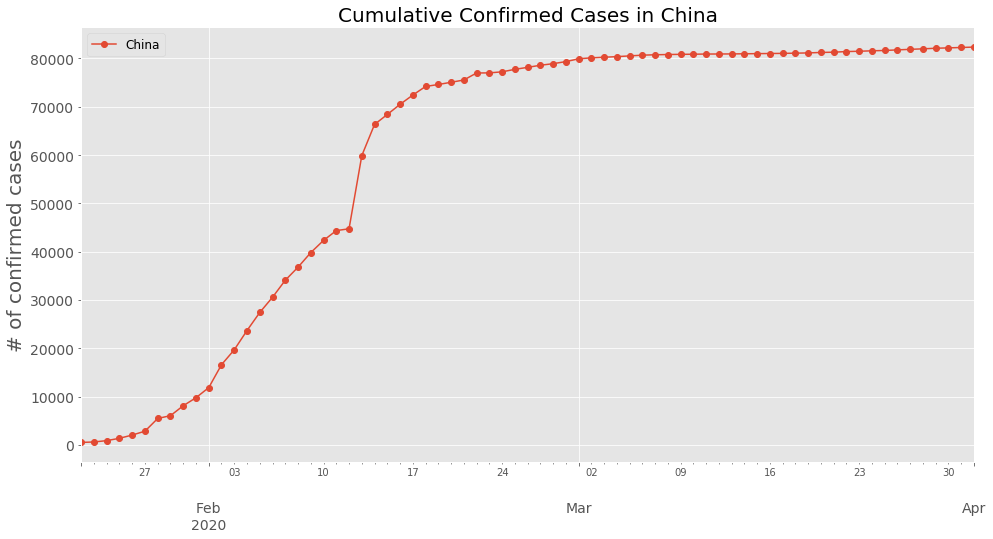

In [9]:
#China confirmed count
def create_trend_line2(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(16,8))
    tmp_df[country].plot(ax=ax, marker='o')
    ax.set_title(fig_title, fontsize=20)
    plt.xlabel('', fontsize=20)
    plt.ylabel('# of confirmed cases', fontsize=20)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
#     ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d"))
    plt.legend(fontsize=12)
    return

create_trend_line2(jhu_data_process_date(df), ['China'], 'Cumulative Confirmed Cases in China')

In [10]:
## Convert the data format into 2-day (other versions are in the back)
def jhu_data_process_2day_specific(date_df, day_threshold):
    country_arrays = [np.array(date_df[c])[np.array(date_df[c]) > day_threshold] for c in date_df.columns]
    day_df = pd.DataFrame(country_arrays).T
    day_df.columns = list(date_df.columns)
    day_df.index += 1 
    # calculate daily increase
    temp_df = day_df.diff(periods=1)
    series_list = [temp_df[c].shift(-1)[temp_df[c].shift(-1) > 0].reset_index(drop=True) for c in temp_df.columns]
    daily_increase_df = pd.DataFrame(series_list).T
    daily_increase_df.index = daily_increase_df.index + 1
    ## make it do the average of 2 days
    # sum up 2 days
    list_list = [[round((daily_increase_df[c][n]+daily_increase_df[c][n+1])/2) 
                             for n in range(1,len(daily_increase_df)) if n % 2 == 1] for c in daily_increase_df.columns]
    avg_2day_increase_df = pd.DataFrame(list_list, index = list(daily_increase_df.columns)).T
    return avg_2day_increase_df

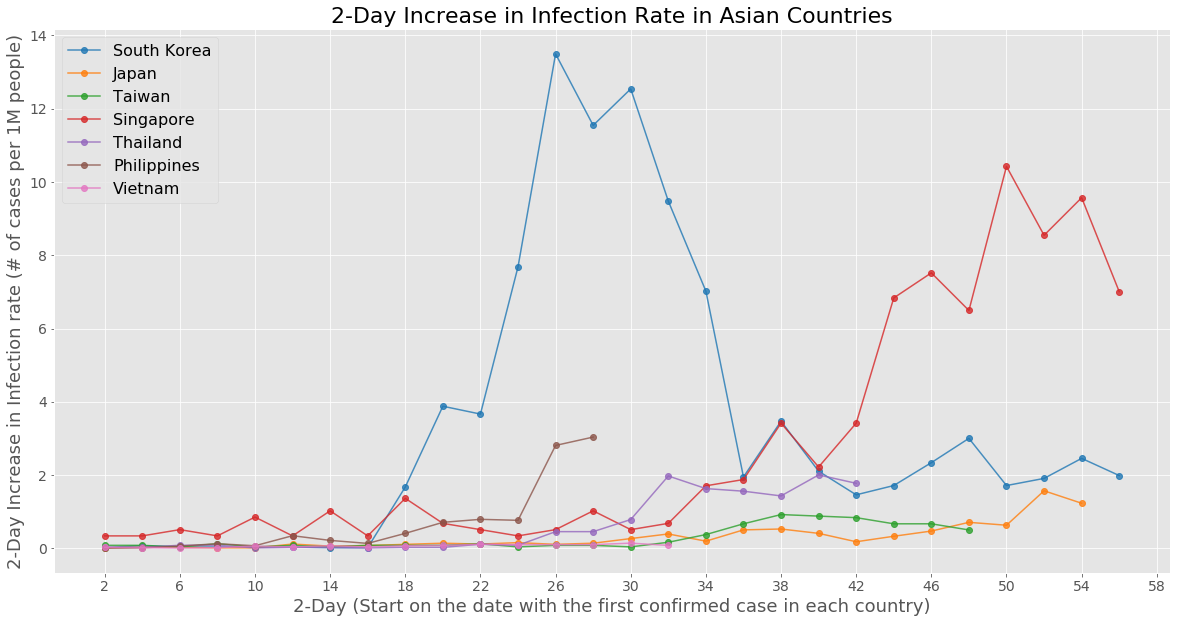

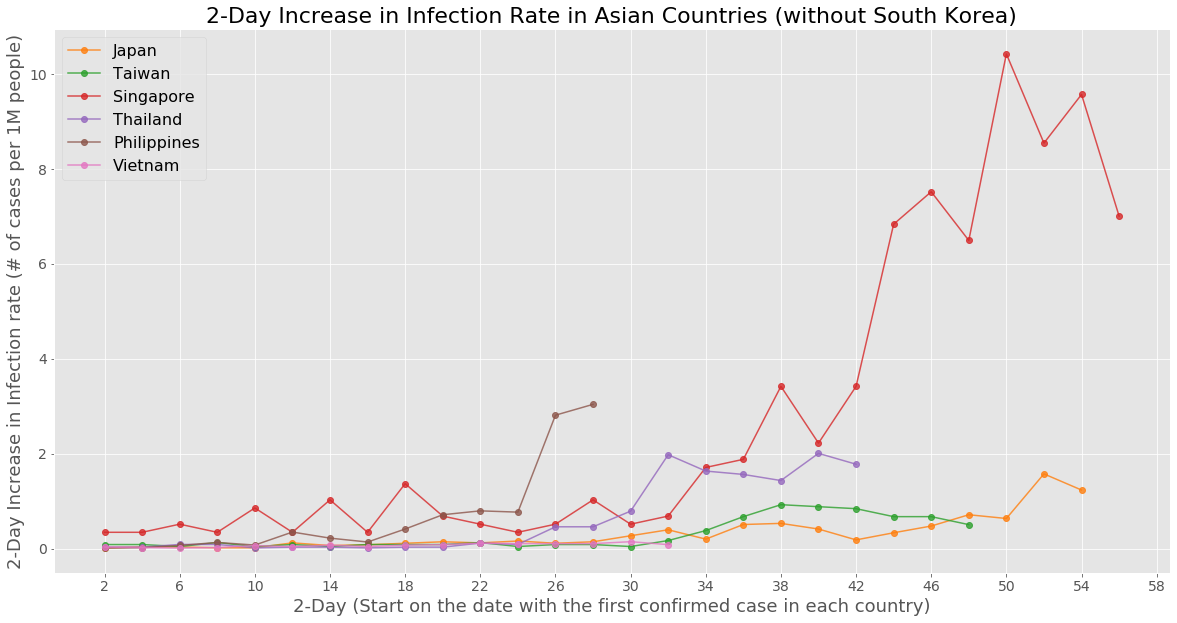

In [47]:
## new version: Infection rate with Asian Countries
def create_trend_line_infection_rate_2day(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    # color (must put before the plotting!)
    NUM_COLORS = 10
    cm = plt.get_cmap('tab10')
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    # plotting
    tmp_df[country].plot(ax=ax, marker='o', alpha=0.8)
    # highlight
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('2-Day (Start on the date with the first confirmed case in each country)', fontsize=18)
    plt.ylabel('2-Day Increase in Infection rate (# of cases per 1M people)', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
#     control the x tick frequency and range
    x_range = [n for n in range(2,60) if (n+2) % 4 == 0] # [2, 6, 10, 14, 18, 22, 26]
    plt.xticks(np.arange(30), x_range)
    plt.locator_params(axis='x', nbins=16)
#     fig.savefig('plot_asian')
    return 

asia_country = ['South Korea','Japan', 'Taiwan', 'Singapore', 'Thailand', 'Philippines', 'Vietnam']
asia_country2 = ['Japan', 'Taiwan', 'Singapore', 'Thailand', 'Philippines', 'Vietnam']

# population per 1M version
create_trend_line_infection_rate_2day(data_process_avg(jhu_data_process_2day_specific(jhu_data_process_date(df), 0)),
                                     asia_country, 
                                 '2-Day Increase in Infection Rate in Asian Countries')

def create_trend_line_infection_rate_2day(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    # color (must put before the plotting!)
    NUM_COLORS = 10
    cm = plt.get_cmap('tab10')
    ax.set_prop_cycle(color=[cm(1.*(i+1)/NUM_COLORS) for i in range(NUM_COLORS)])
    # plotting
    tmp_df[country].plot(ax=ax, marker='o', alpha=0.8)
    # highlight
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('2-Day (Start on the date with the first confirmed case in each country)', fontsize=18)
    plt.ylabel('2-Day Increase in Infection rate (# of cases per 1M people)', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
#     control the x tick frequency and range
    x_range = [n for n in range(2,60) if (n+2) % 4 == 0] # [2, 6, 10, 14, 18, 22, 26]
    plt.xticks(np.arange(30), x_range)
    plt.locator_params(axis='x', nbins=16)
#     fig.savefig('plot_asian_no_korea')
    return 


# without South Korea
create_trend_line_infection_rate_2day(data_process_avg(jhu_data_process_2day_specific(jhu_data_process_date(df), 0)),
                                     asia_country2, 
                                 '2-Day Increase in Infection Rate in Asian Countries (without South Korea)')

In [12]:
## Top 10 countries
def top_country(complete_df, rank):    
    top = complete_df.T.iloc[:,-1].sort_values(ascending=False)[0:30] # some countries have inconsistent name so limit the number
    top_avg = {c: round(top[c]/country_pop_dict.get(c)*1000000,2) for c in top.index}
    return pd.Series(top_avg, name='Infection Rate').sort_values(ascending=False)[0:rank]
#     return top

pd.DataFrame(top_country(jhu_data_process_date(df), 20))[0:10]

,Infection Rate
Spain,2226.90
Switzerland,2053.01
Italy,1828.82
Belgium,1204.87
Austria,1189.27
Germany,929.44
Norway,897.03
France,884.72
Portugal,809.18
Netherlands,799.31


In [13]:
country_pop_dict.get('Luxembourg')

625978

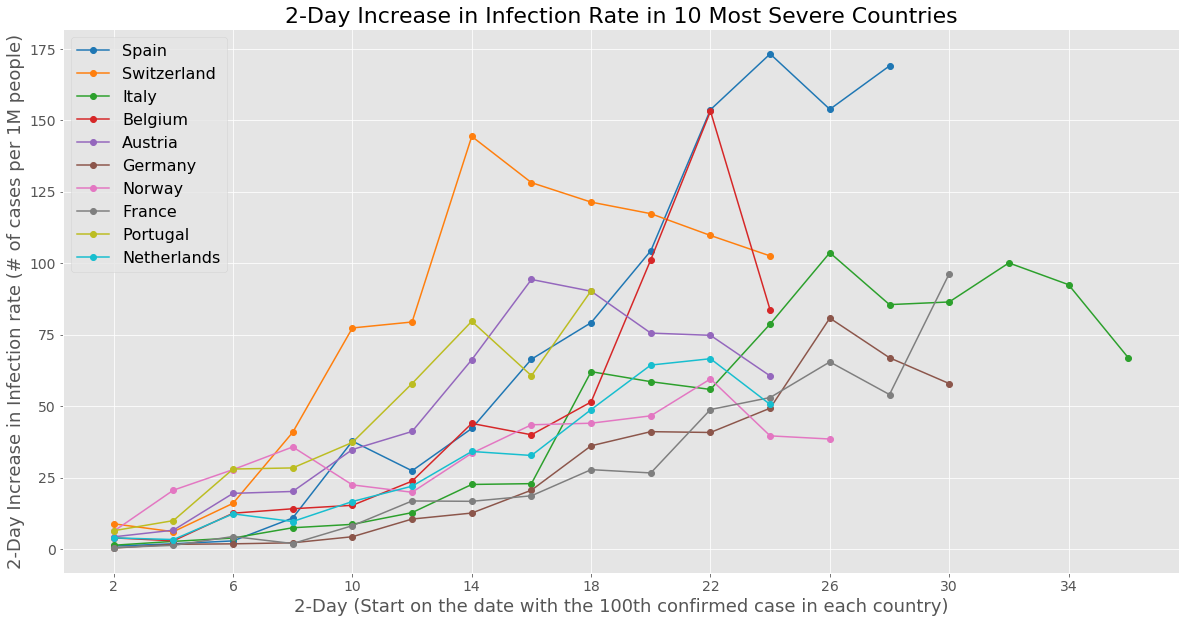

In [42]:
## Top 10 countries plot
top_country_list = list(pd.DataFrame(top_country(jhu_data_process_date(df), 20), )[0:10].index)

def create_trend_line_infection_rate_2day(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    # color (must put before the plotting!)
    NUM_COLORS = 10
    cm = plt.get_cmap('tab10')
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    # plotting
    tmp_df[country].plot(ax=ax, marker='o')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('2-Day (Start on the date with the 100th confirmed case in each country)', fontsize=18)
    plt.ylabel('2-Day Increase in Infection rate (# of cases per 1M people)', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
#     plt.xticks(np.arange(14), [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26])
    x_range = [n for n in range(2,44) if (n+2) % 4 == 0]
    plt.xticks(np.arange(18), x_range)
    plt.locator_params(axis='x', nbins=12)
    return 

create_trend_line_infection_rate_2day(data_process_avg(jhu_data_process_2day_specific(jhu_data_process_date(df), 100)),
                                     top_country_list, 
                                 '2-Day Increase in Infection Rate in 10 Most Severe Countries')

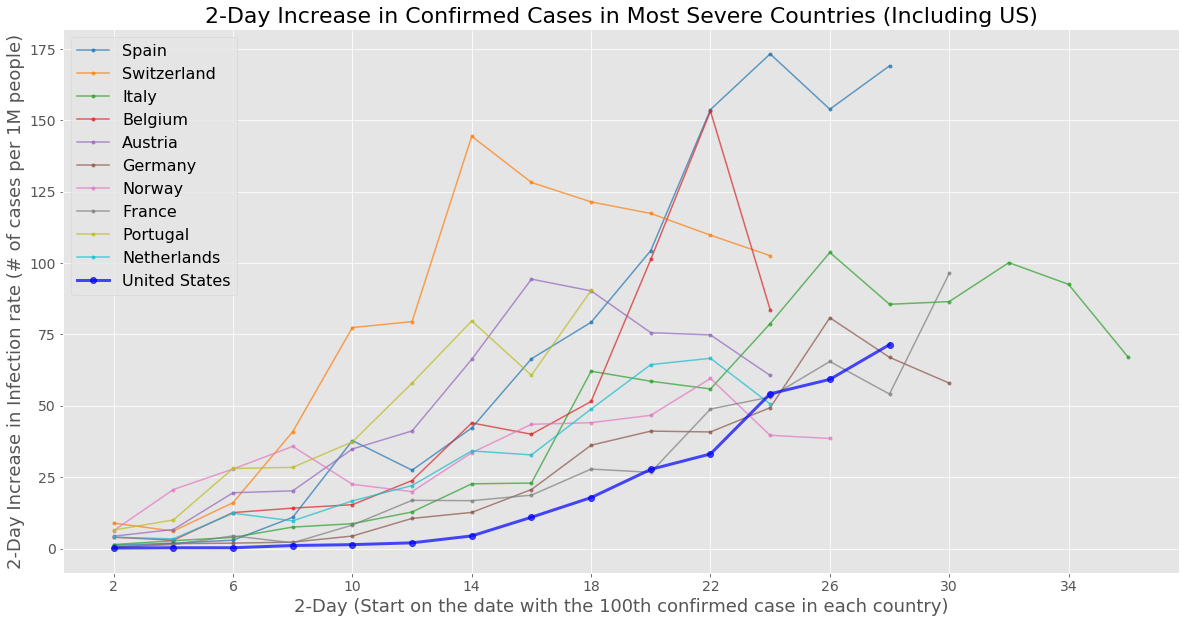

In [41]:
## Top 10 countries plot plus US
# top_country_list = list(pd.DataFrame(top_country(jhu_data_process_date_top(df), 20), )[0:10].index)

def create_trend_line_infection_rate_2day(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    # color (must put before the plotting!)
    NUM_COLORS = 10
    cm = plt.get_cmap('tab10')
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    # plotting
    tmp_df[country].plot(ax=ax, marker='.', alpha=0.7)
    # highlight
    tmp_df['United States'].plot(color='blue', linewidth=3, marker='o',alpha=0.7)
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('2-Day (Start on the date with the 100th confirmed case in each country)', fontsize=18)
    plt.ylabel('2-Day Increase in Infection rate (# of cases per 1M people)', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
#     plt.xticks(np.arange(14), [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26])
    x_range = [n for n in range(2,44) if (n+2) % 4 == 0]
    plt.xticks(np.arange(18), x_range)
    plt.locator_params(axis='x', nbins=12)
    return 

create_trend_line_infection_rate_2day(data_process_avg(jhu_data_process_2day_specific(jhu_data_process_date(df), 100)),
                                     top_country_list, 
                                 '2-Day Increase in Confirmed Cases in Most Severe Countries (Including US)')


## The End
#### Please refer to GitHub page for more info and contact.
https://github.com/HiIamJeff/COVID19_Spot_the_Curve

## Random Note


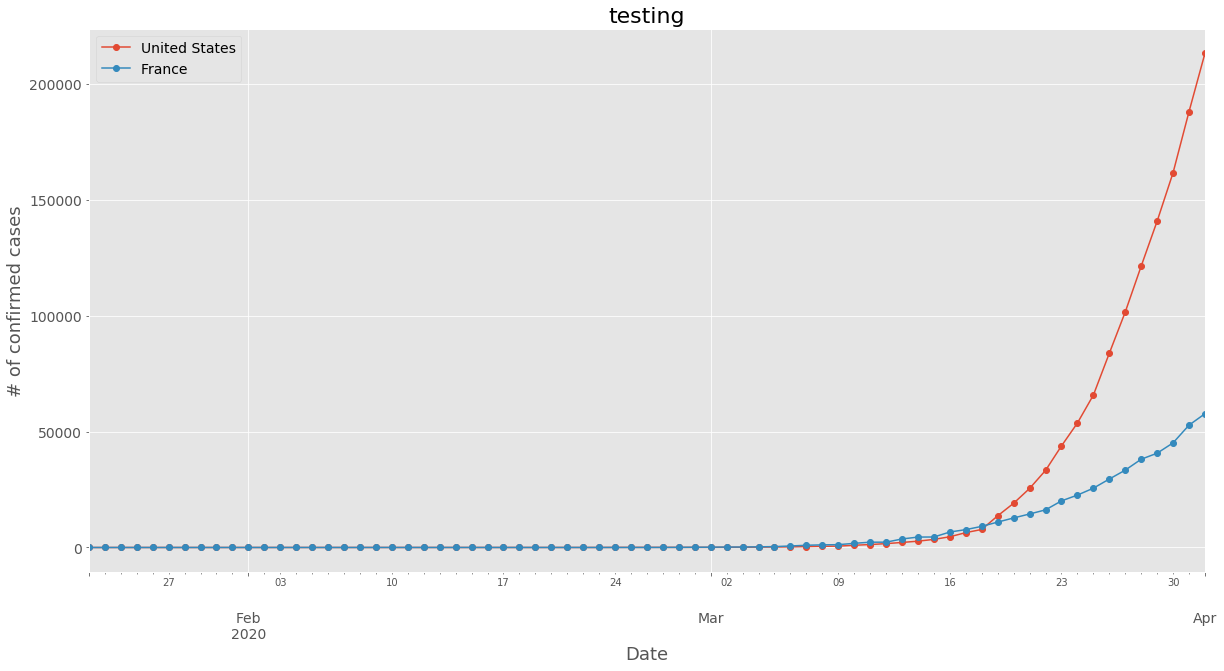

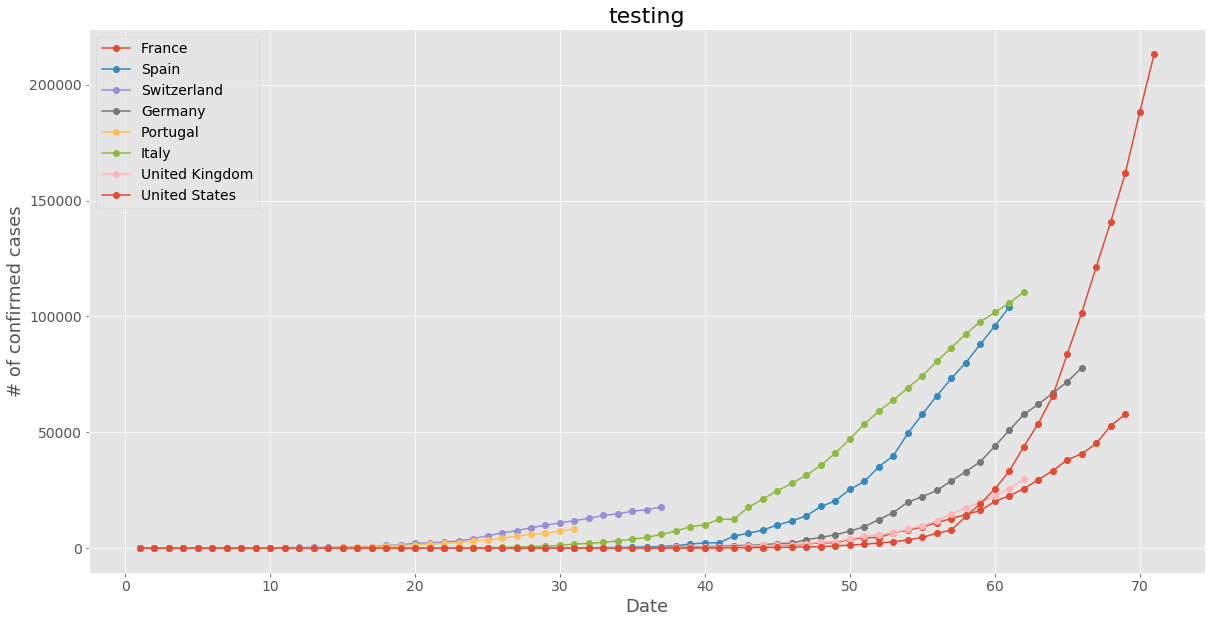

In [16]:
def create_trend_line2(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[country].plot(ax=ax, marker='o')
#     plt.yscale('log')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('# of confirmed cases', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=14)
#     fig.savefig(os.path.join(image_dir, create_save_file(col, country, 'trendline')))
    return 

# ax.get_figure()
# font = {'weight': 'bold','size': 25}
# plt.rc('font', **font)

plt.style.use('ggplot')
# plt.style.use('seaborn-talk')
europe_country = ['France', 'Spain', 'Switzerland',
                  'Germany', 'Portugal', 'Italy', 'United Kingdom', 'United States']
create_trend_line2(jhu_data_process_date(df), ['United States','France'], 'testing')
create_trend_line2(jhu_data_process_day(jhu_data_process_date(df)), europe_country, 'testing')

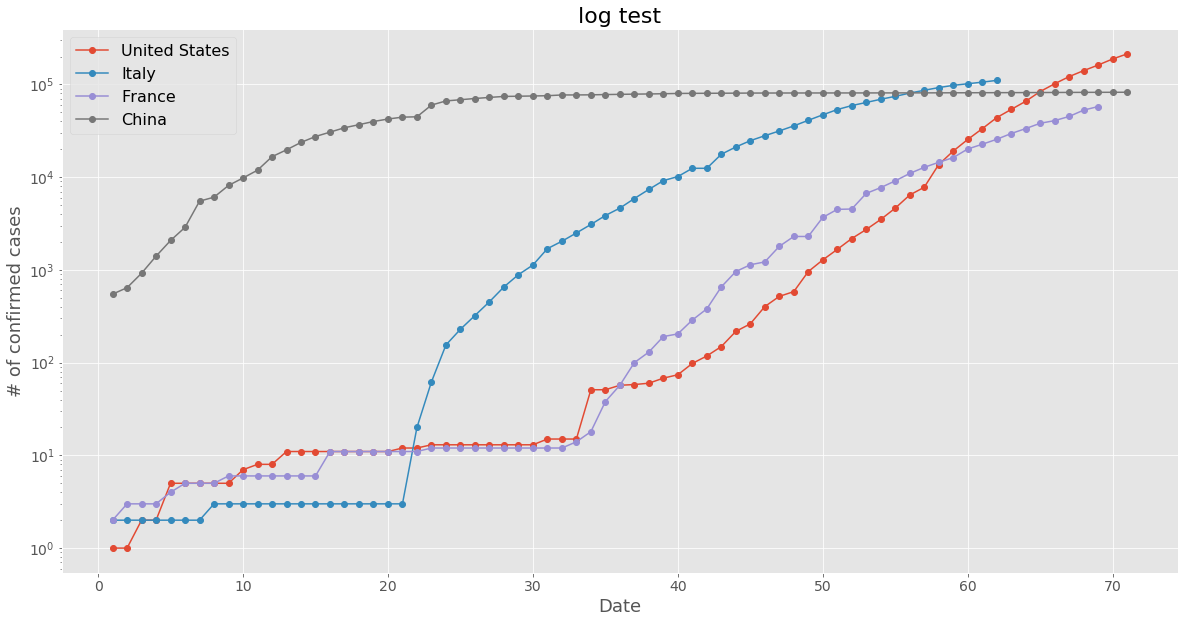

In [17]:
def create_trend_line_log(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[country].plot(ax=ax, marker='o')
    plt.yscale('log')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('# of confirmed cases', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
    return 

create_trend_line_log(jhu_data_process_day(jhu_data_process_date(df)), ['United States','Italy','France', 'China'], 'log test')

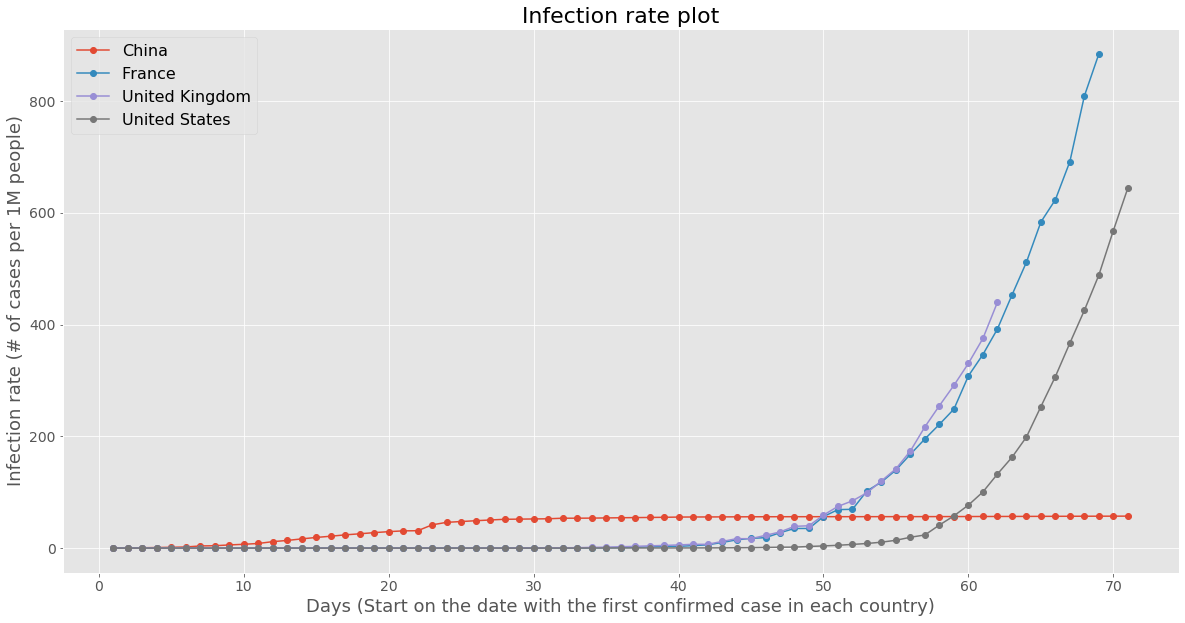

In [18]:
### Infection rate plot

def create_trend_line_infection_rate_day(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[country].plot(ax=ax, marker='o')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('Days (Start on the date with the first confirmed case in each country)', fontsize=18)
    plt.ylabel('Infection rate (# of cases per 1M people)', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
    return 

create_trend_line_infection_rate_day(data_process_avg(jhu_data_process_day(jhu_data_process_date(df))), 
                   ['China', 'France', 'United Kingdom', 'United States'], 
                   'Infection rate plot')

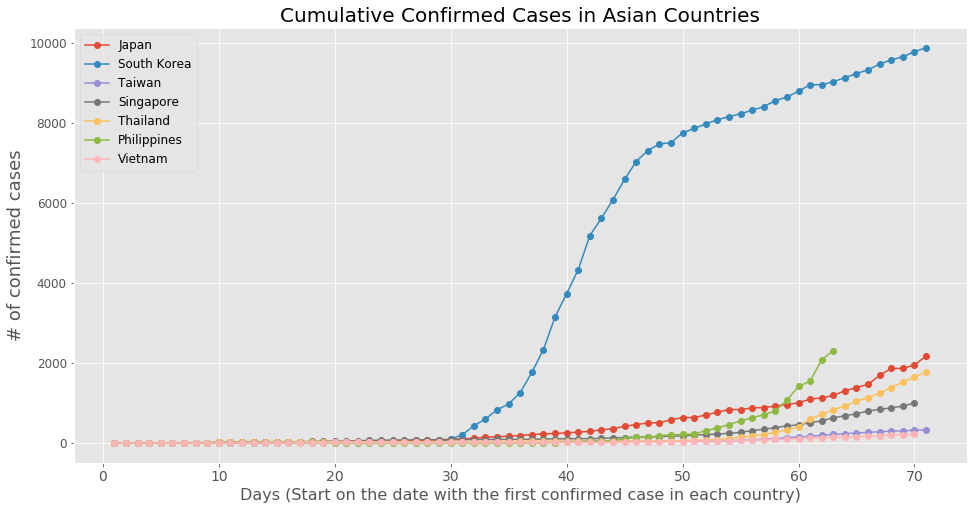

In [19]:
## Cumulative # no use
asia_country = ['Japan', 'South Korea','Taiwan', 'Singapore', 'Thailand', 'Philippines', 'Vietnam']
# plot for other asian countries
def create_trend_line2(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(16,8))
    tmp_df[country].plot(ax=ax, marker='o')
    ax.set_title(fig_title, fontsize=20)
    plt.xlabel('Days (Start on the date with the first confirmed case in each country)', fontsize=16)
    plt.ylabel('# of confirmed cases', fontsize=18)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=12)
    plt.legend(fontsize=12)
    return 

create_trend_line2(jhu_data_process_day(jhu_data_process_date(df)),
                   asia_country, 'Cumulative Confirmed Cases in Asian Countries')

In [20]:
## daily increase df

def jhu_data_process_day_specific(date_df, day_threshold):
    country_arrays = [np.array(date_df[c])[np.array(date_df[c]) > day_threshold] for c in date_df.columns]
    day_df = pd.DataFrame(country_arrays).T
    day_df.columns = list(date_df.columns)
    day_df.index += 1 
    # calculate daily increase
    temp_df = day_df.diff(periods=1)
    series_list = [temp_df[c].shift(-1)[temp_df[c].shift(-1) > 0].reset_index(drop=True) for c in temp_df.columns]
    daily_increase_df = pd.DataFrame(series_list).T
    daily_increase_df.index = daily_increase_df.index + 1
    return daily_increase_df

def jhu_data_process_2day_specific(date_df, day_threshold):
    country_arrays = [np.array(date_df[c])[np.array(date_df[c]) > day_threshold] for c in date_df.columns]
    day_df = pd.DataFrame(country_arrays).T
    day_df.columns = list(date_df.columns)
    day_df.index += 1 
    # calculate daily increase
    temp_df = day_df.diff(periods=1)
    series_list = [temp_df[c].shift(-1)[temp_df[c].shift(-1) > 0].reset_index(drop=True) for c in temp_df.columns]
    daily_increase_df = pd.DataFrame(series_list).T
    daily_increase_df.index = daily_increase_df.index + 1
    ## make it do the average of 2 days
    # sum up 2 days
    list_list = [[round((daily_increase_df[c][n]+daily_increase_df[c][n+1])/2) 
                             for n in range(1,len(daily_increase_df)) if n % 2 == 1] for c in daily_increase_df.columns]
    avg_2day_increase_df = pd.DataFrame(list_list, index = list(daily_increase_df.columns)).T
    return avg_2day_increase_df

## This is for bigger number
## Just leave it for now. Too many things to be considered (should change the interval based on each case)
def jhu_data_process_3day_specific_moving(date_df, day_threshold):
    country_arrays = [np.array(date_df[c])[np.array(date_df[c]) > day_threshold] for c in date_df.columns]
    day_df = pd.DataFrame(country_arrays).T
    day_df.columns = list(date_df.columns)
    day_df.index += 1 
    # caluculate daily increase
    temp_df = day_df.diff(periods=1)
    series_list = [temp_df[c].shift(-1)[temp_df[c].shift(-1) > 0].reset_index(drop=True) for c in temp_df.columns]
    daily_increase_df = pd.DataFrame(series_list).T
    daily_increase_df.index = daily_increase_df.index + 1
    # calculate daily increase with moving average of 2 days
    list_list = [np.convolve(daily_increase_df[c], np.ones((3,))/3, mode='valid') for c in daily_increase_df.columns]
    avg_2day_increase_df = pd.DataFrame(list_list, index = list(daily_increase_df.columns)).T
    return avg_2day_increase_df

# np.convolve(jhu_data_process_date(df, europe_country)['United States'], np.ones((2,))/2, mode='valid')

# jhu_data_process_3day_specific_moving(jhu_data_process_date(df, country_list), 100)

# jhu_data_process_2day_specific(jhu_data_process_date(df, country_list), 100)

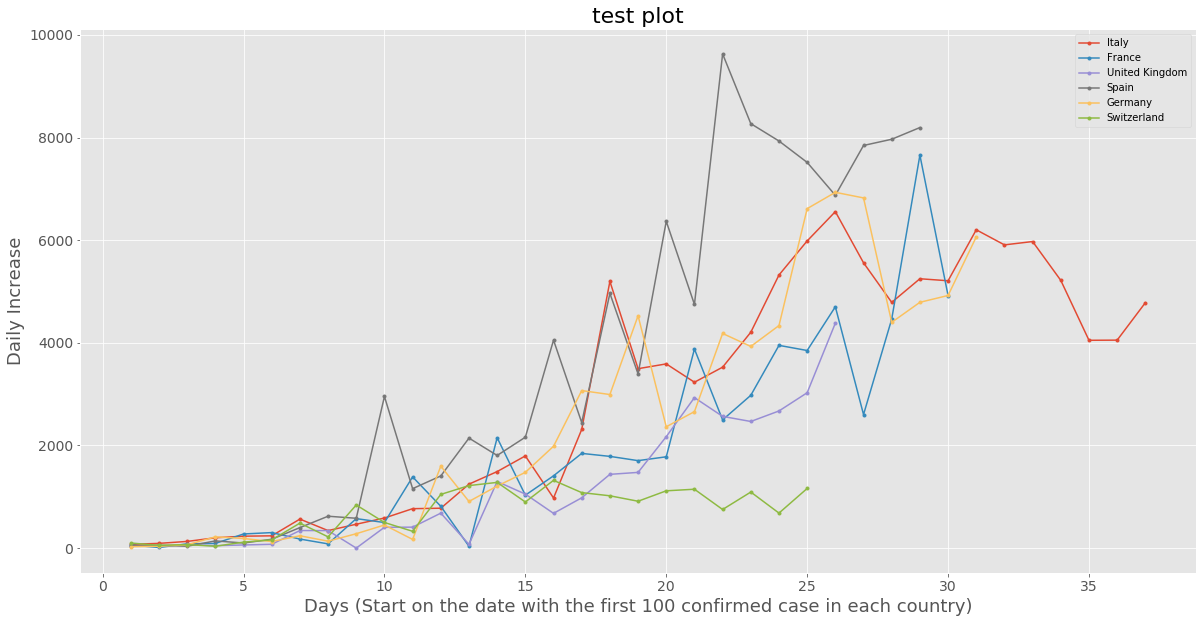

In [21]:
## daily increase cases plot!
def create_trend_line_daily_increase(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[country].plot(ax=ax, kind='line', marker='.')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('Days (Start on the date with the first 100 confirmed case in each country)', fontsize=18)
    plt.ylabel('Daily Increase', fontsize=18)
#     plt.yscale('log')
    ax.tick_params(labelsize=14)
    return 

create_trend_line_daily_increase(jhu_data_process_day_specific(jhu_data_process_date(df), 100), 
                                 ['Italy', 'France', 'United Kingdom', 'Spain', 'Germany','Switzerland'], 
                                 'test plot')

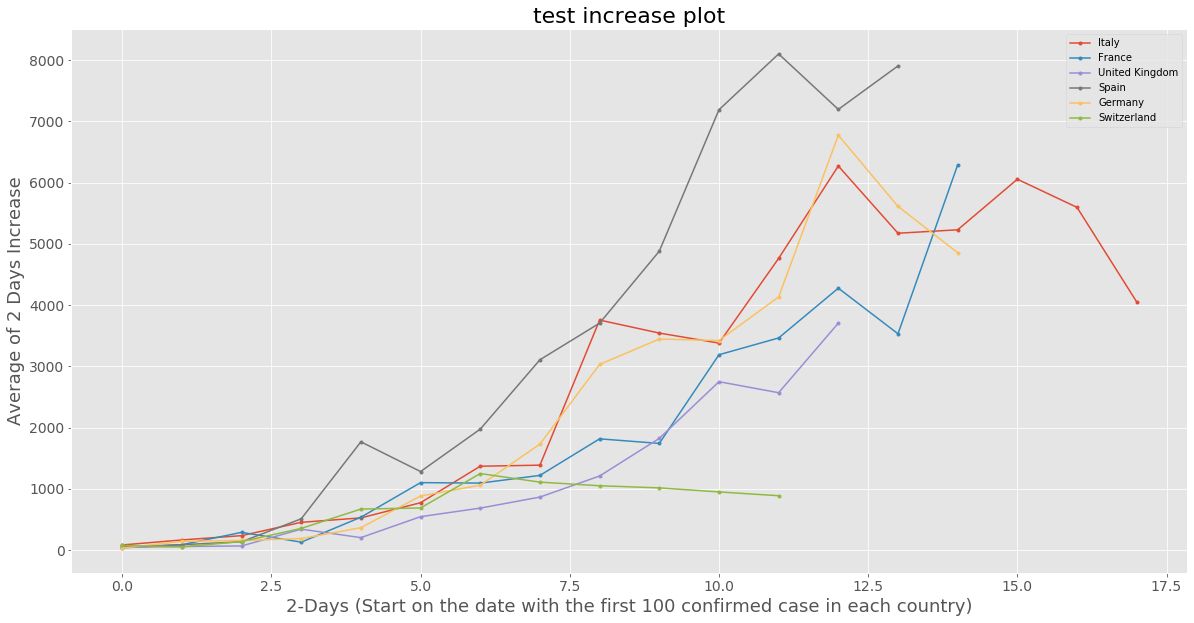

In [22]:
## daily increase cases plot!
def create_trend_line_2day_increase(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[country].plot(ax=ax, kind='line', marker='.')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('2-Days (Start on the date with the first 100 confirmed case in each country)', fontsize=18)
    plt.ylabel('Average of 2 Days Increase', fontsize=18)
#     plt.yscale('log')
    ax.tick_params(labelsize=14)
    return 

create_trend_line_2day_increase(jhu_data_process_2day_specific(jhu_data_process_date(df), 100), 
                                 ['Italy', 'France', 'United Kingdom', 'Spain', 'Germany','Switzerland'], 
                                 'test increase plot')

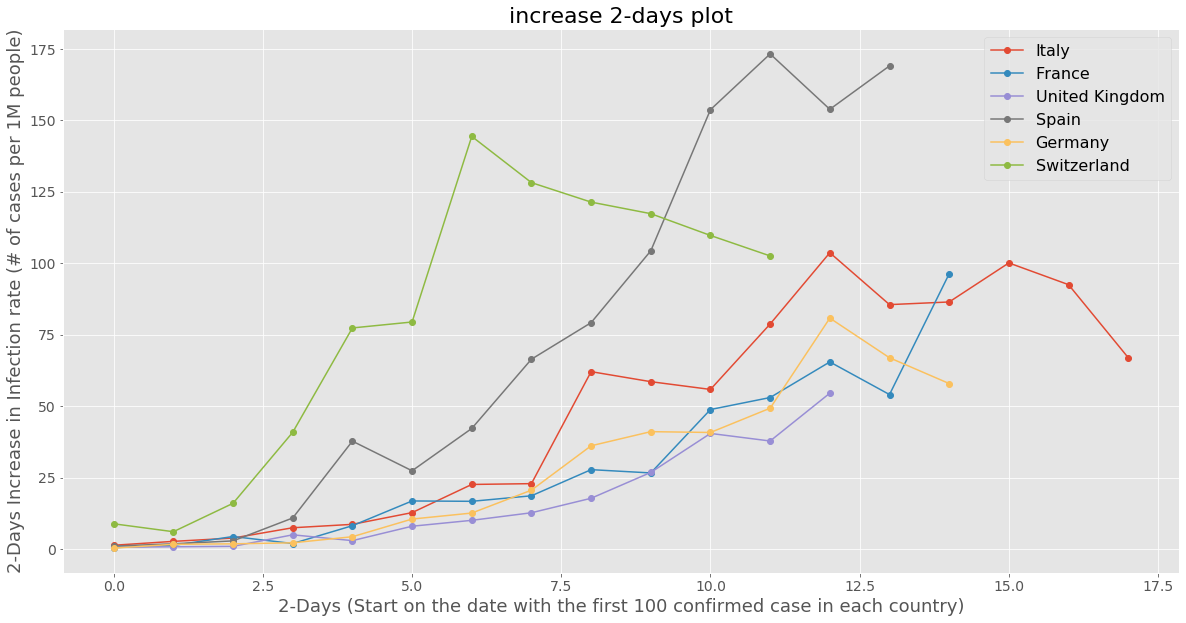

In [23]:
def create_trend_line_infection_rate_2day(tmp_df, country, fig_title):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[country].plot(ax=ax, marker='o')
    ax.set_title(fig_title, fontsize=22)
    plt.xlabel('2-Days (Start on the date with the first 100 confirmed case in each country)', fontsize=18)
    plt.ylabel('2-Days Increase in Infection rate (# of cases per 1M people)', fontsize=18)
    ax.tick_params(labelsize=14)
    plt.legend(fontsize=16)
    return 
create_trend_line_infection_rate_2day(data_process_avg(jhu_data_process_2day_specific(jhu_data_process_date(df), 100)),
                                     ['Italy', 'France', 'United Kingdom', 'Spain', 'Germany','Switzerland'], 
                                 'increase 2-days plot')

#### nurse and hospital bed
Too little data (only 40s countries)

In [24]:
# https://stats.oecd.org/Index.aspx?ThemeTreeId=9
## hospital beds
## only has about 40s countries data. Ignore first.
data_path = r'C:\Users\ADMIN\Desktop\Python\Project_Coronavirus (COVID-19)\COVID19_Spot_the_Curve'
data_file = 'HEALTH_REAC_hotpital_bed.csv'
bed_data = pd.read_csv(data_path + '/' + data_file, usecols = ['Variable', 'Measure', 'Country', 'Year', 'Value'])
bed_df = bed_data.copy()

print('Complete')

Complete


In [25]:
bed_df = bed_data.copy()
bed_df.head()
bed_df = bed_df[(bed_df['Variable'] == 'Total hospital beds') & (bed_df['Measure'] == 'Number')]
# bed_df['Variable'].value_counts()
# for i in set(bed_df['Country']):
#     print(i)
# len(set(bed_df['Country']))

In [26]:
bed_df['Year'].value_counts()
# 40 countries
bed_df[bed_df['Year'] == 2017]


# bed_df[0:20]

,Variable,Measure,Country,Year,Value
98,Total hospital beds,Number,Austria,2017,64805.00
242,Total hospital beds,Number,Belgium,2017,64423.00
356,Total hospital beds,Number,Canada,2017,92462.00
471,Total hospital beds,Number,Czech Republic,2017,70214.00
590,Total hospital beds,Number,Denmark,2017,15037.00
732,Total hospital beds,Number,Finland,2017,18071.90
858,Total hospital beds,Number,France,2017,399865.00
1002,Total hospital beds,Number,Germany,2017,661448.00
1140,Total hospital beds,Number,Greece,2017,45267.00
1269,Total hospital beds,Number,Hungary,2017,68702.00


#### nurse
definition: Practicing nurses refers to the total number of nurses certified/registered and actively practicing in public and private hospitals, clinics and other health facilities, including self-employed. Nursing assistants and midwives should be included

In [27]:
## practicing nutse
